## Model Project

For the following project, we consider the exam in Microeconomics I from 2019, winter. We wish to solve problem 2 and 3. 

We solve the utility maximization problem given a particular utility function. First, we find a general solution and map the indifference curves for certain levels of utility. Thereafter, we find optimal solutions for given levels of Income and prices.

Given a production function and certain cost_structure we solve a firm's profit maximization problem and find the firm's optimal quantity produced. Furthermore, given, price, factor prices and fixed costs we find the optimal conditional factor demands of labour, $l$, and capital, $k$, the optimal quantity and subsequent profit.

**Imports and set magics**

In [4]:
import numpy as np
from scipy import optimize
import sympy as sm
from sympy import Symbol
from sympy.solvers import solve
import matplotlib.pyplot as plt

from sympy import *
sm.init_printing(use_unicode=True)
from scipy.misc import derivative

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

### 1. Consumer Theory

We consider a consumer with utility given by:

$u(x_1, x_2) = 8 \sqrt{x_1} + x_2$         $(1)$

The possible consumption frontier is $(x_1, x_2) \in \mathbb{R}_+^2$. The prices of the two goods, $x_1, x_2$, are given by $p_1$ and $p_2$ respectively. Income is given by $I$, and we assume $p_1, p_2, I >0$ 

**1.1 Indifference curves**

We wish to draw the indifference curves for different values of utility, such as to visualize consumption bundles for set level of utility. From $(1)$ we isolate to $x_2$ such that:

$u_0 = 8 \sqrt{x_1} + x_2 \Leftrightarrow x_2 = u_0 - 8 \sqrt{x_1}$ 

In [184]:
# Define utility function, $x_2$ as a function of $x_1$.
def x_2u(u,x_1):
    return (u- 8*np.sqrt(x_1))

We set $u_0$ to a list of set values:

In [2]:
u_0 = [19.96, 24.00, 27.96]

Now we draw 10.000 values of $x_1$ and create 3 empty vectors. These are used to graph the indifference curves at certain levels of utility as specified in u_0.

In [5]:
N = 10000

x_1_vec = np.linspace(0.001,10,N)
x_2_vec0 = np.empty(N)
x_2_vec1 = np.empty(N)
x_2_vec2 = np.empty(N)
for i,x in enumerate(x_1_vec):
    x_2_vec0[i] = x_2u(u_0[0], x)
    x_2_vec1[i] = x_2u(u_0[1], x)
    x_2_vec2[i] = x_2u(u_0[2], x)

Below we plot three indifference curves at the utility specified in u_0.

Text(0.5,1,'Figure 1: Indifference Curves')

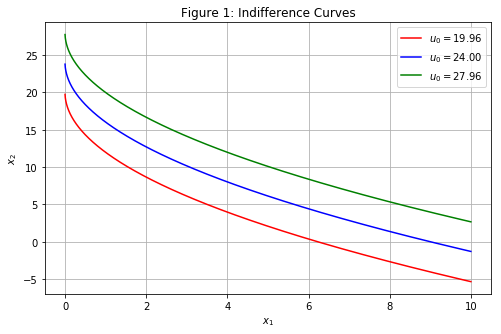

In [6]:
fig = plt.figure(figsize=(8,5))

ax = fig.add_subplot(1,1,1)
ax.plot(x_1_vec, x_2_vec0, color="red", label='$u_0 = 19.96$')
ax.plot(x_1_vec, x_2_vec1, color="blue", label='$u_0 = 24.00$')
ax.plot(x_1_vec, x_2_vec2, color="green", label='$u_0 = 27.96$')
ax.grid(True)
ax.set_ylabel('$x_2$')
ax.set_xlabel('$x_1$')
ax.legend(loc='upper right')
plt.title("Figure 1: Indifference Curves")


We note from the indifference curves, that the consumer's preferences are both monotonic and convex.

**1.2 The utility maximization problem**

Now we wish to solve the utility maximization problem using the Lagrangian.

As such we have the following maximization problem:

$\max\limits_{x_1, x_2} 8 \sqrt{x_1} + x_2$ 

s.t. $p_1 x_1 + p_2 x_2 = I$

$\mathcal{L} = 8 \sqrt{x_1} + x_2 + \lambda [I - p_1 x_1 - p_2 x_2]$

In [185]:
#Define out variables using sympy.symbols
I = sm.symbols('I')
lam = sm.symbols('\lambda')
p_1, p_2 = sm.symbols('p_1 p_2') 
x_1, x_2 = sm.symbols('x_1 x_2')

In [186]:
#Define the maximization problem
def lagrangian(x_1=x_1, x_2=x_2, lam = lam, I = I, p_1 = p_1, p_2 = p_2):
    return 8*sqrt(x_1) + x_2 + lam * (I - p_1*x_1 - p_2*x_2)

In [189]:
#First order conditions w.r.t. the first good, second good and lambda. These are stored.
FOC_x1 = diff(lagrangian(), x_1)
FOC_x2 = diff(lagrangian(), x_2)
FOC_lam = diff(lagrangian(), lam)

In [190]:
#Solve the first order conditions w.r.t. x_1 to lambda.
eq1 = sm.solve(FOC_x1, lam)[0]
eq1

In [191]:
#Solve the first order conditions w.r.t. x_2 to lambda.
eq2 = sm.solve(FOC_x2, lam)[0]
eq2

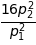

In [192]:
#Combining the eq1 and eq2 to find the optmial consumption of good 1.
x_1_star = sm.solve((eq1-eq2), x_1)[0]
x_1_star

In [194]:
#Define the budget constraint.
def budget_constraint(x_1 = x_1, x_2 = x_2, I=I, p_1=p_1, p_2=p_2):
    return I - p_1*x_1 - p_2*x_2

In [195]:
#Inserting optimal consumption of good 1 in the budget constraint to solve optimal consumption of good 2.
x_2_star = sm.solve(budget_constraint(x_1=x_1_star), x_2)[0]
x_2_star

We note, that we noly have an inner solution when:

$x_2^* > 0 \Leftrightarrow \frac{I}{p_2}-\frac{16 p_2}{p_1} > 0 \Leftrightarrow$

In [197]:
#Requiremt for income, I.
I_boundry = sm.solve((x_2_star), I)[0]
I_boundry

As such, we have an inner solution when the following applies for income, $I$:

$I > \frac{16 p_2^2}{p_1}$

**1.3 Consumption and utility at given parameter values**

The following analyzes the optimal consumption levels and consequential level of utility for given paramter values - both mathematically and graphically. First, we consider the following parameter values:

$I = 20$

$p_1 = 4$

$p_2 = 1$

Below we set the given parameter values. Using an optimizer we solve for the optimal consumption of the two goods, $x_1, x_2$ and the subsequent utility, $u$.

In [18]:
# a. choose parameters
I_1 = 20
p_1_1 = 4
p_2_1 = 1

# b. value-of-choice
def value_of_choice(x_1_1, p_1_1, p_2_1, I_1):
    x_2_1 = (I_1-p_1_1*x_1_1)/p_2_1
    utility = 8*sqrt(x_1_1) + x_2_1
    return utility

# c. objective
obj = lambda x_1_1: -value_of_choice(x_1_1, p_1_1, p_2_1, I_1)

# d. solve
solution = optimize.minimize_scalar(obj,bounds=(0,I_1/p_1_1))

# e. result
x_1_1 = solution.x
x_2_1 = (I_1-x_1_1*p_1_1)/p_2_1
utility_value_1 = 8*sqrt(x_1_1) + x_2_1
print(f'Optimal consumption of good 1 and good 2 with given income and given prices is: {x_1_1:0.2} and {x_2_1:0.3}. This yields utility of {utility_value_1:0.2}')


Optimal consumption of good 1 and good 2 with given income and given prices is: 1.0 and 16.0. This yields utility of 24


The indifference curve for this level of utility along with the budget constraing is plotted below. We clearly see that the intersection of the budget constraint and indifference curve corresponds to the specified consumption bundle.

In [202]:
#Three empty vectores for good 1, good 2 and budget constraint, x_1 randomly drawn, N=10.000
N = 10000
x_1_vec = np.linspace(0.001,10,N)
x_2_vec = np.empty(N)
budgetconstraint_vec = np.empty(N)

#Vector to plot indifference curve, utility = 24, given x_1 values. Budget constraint for given income and prices.
for i,x in enumerate(x_1_vec):
    x_2_vec[i] = x_2u(utility_value_1, x)
    budgetconstraint_vec[i] = (I_1 - p_1_1 * x) / p_2_1

Text(0.5,1,'Figure 2: Optimal Consumption At Utility of 24')

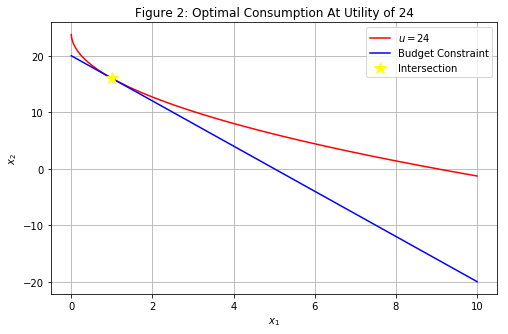

In [201]:
#Plotting the indifference curve and budget contraint.
fig = plt.figure(figsize=(8,5))

ax = fig.add_subplot(1,1,1)
ax.plot(x_1_vec, x_2_vec, color="red", label='$u=24$')
ax.plot(x_1_vec, budgetconstraint_vec, color="blue", label="Budget Constraint")

ax.plot(x_1_1,x_2_1,ls='',marker='*',
        markersize=12,markerfacecolor='yellow',
        markeredgecolor='yellow',label='Intersection')

ax.grid(True)
ax.set_ylabel('$x_2$')
ax.set_xlabel('$x_1$')
ax.legend(loc='upper right')
plt.title("Figure 2: Optimal Consumption At Utility of 24")

We note, the intersection between the indifference curve and budget constraint is the optimal solution found above. $x_1^*$ = 1, $x_2^* = 16$

Now we consider the following parameter values:

$I = 20$

$p_1 = 4$

$p_2 = 1$

In [23]:
# a. choose parameters
I_2 = 17
p_1_2 = 2
p_2_2 = 1

# b. value-of-choice
def value_of_choice(x_1_2, p_1_2, p_2_2, I_2):
    x_2_2 = (I_2-p_1_2*x_1_2)/p_2_2
    utility = 8*sqrt(x_1_2) + x_2_2
    return utility

# c. objective
obj = lambda x_1_2: -value_of_choice(x_1_2, p_1_2, p_2_2, I_2)

# d. solve
solution = optimize.minimize_scalar(obj,bounds=(0,I_2/p_1_2))

# e. result
x_1_2 = solution.x
x_2_2 = (I_2-x_1_2*p_1_2)/p_2_2
utility_value_2 = 8*sqrt(x_1_2) + x_2_2
print(f'Optimal consumption of good 1 and good 2 with given income and given prices is: {x_1_2:0.2} and {x_2_2:0.2}. This yields utility of {utility_value_2:0.2}')

Optimal consumption of good 1 and good 2 with given income and given prices is: 4.0 and 9.0. This yields utility of 25


The indifference curve for this level of utility along with the budget constraing is plotted below. We clearly see that the intersection of the budget constraint and indifference curve corresponds to the specified consumption bundle.

In [222]:
#Three empty vectores for good 1, good 2 and budget constraint, x_1 randomly drawn, N=10.000
N = 10000

x_1_vec = np.linspace(0.001,10,N)
x_2_vec = np.empty(N)
budgetconstraint_vec = np.empty(N)

#Vector to plot indifference curve, utility = 24, given x_1 values. Budget constraint for given income and prices.
for i,x in enumerate(x_1_vec):
    x_2_vec[i] = x_2u(utility_value_2, x)
    budgetconstraint_vec[i] = (I_2 - p_1_2 * x) / p_2_2

Text(0.5,1,'Figure 3: Optimal Consumption At Utility of 25')

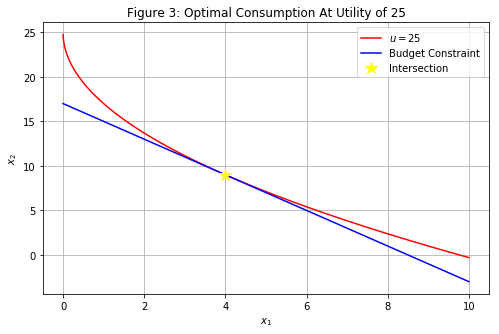

In [204]:
#Plotting the indifference curve and budget contraint.
fig = plt.figure(figsize=(8,5))

ax = fig.add_subplot(1,1,1)
ax.plot(x_1_vec, x_2_vec, color="red", label='$u=25$')
ax.plot(x_1_vec, budgetconstraint_vec, color="blue", label="Budget Constraint")

ax.plot(x_1_2,x_2_2,ls='',marker='*',
        markersize=12,markerfacecolor='yellow',
        markeredgecolor='yellow',label='Intersection')

ax.grid(True)
ax.set_ylabel('$x_2$')
ax.set_xlabel('$x_1$')
ax.legend(loc='upper right')
plt.title("Figure 3: Optimal Consumption At Utility of 25")

We note, that despite a lower income $(I^2 = 17< I^1 = 20)$ in the second case, the lower price of good 1 $(p_1^2 = 2 < p_1^1 = 4)$ secures higher utility in case 2. More so, we note a substitution in consumption towards the now cheaper good 1.

### 2. Production

Consider a firm that produces a good, $x$, with two inputs, capital $k$, and labour $l$. The productionfunction is as follows:

$x = f(l,k) = l^{1/4} k^{1/4}$

Assume the price of labour $(w > 0)$, the price of capital $(r > 0)$ and the price of the good $(p>0)$ and all given exogonously. The firm has fixed costs, $FC≥0$. It can be shown that the conditional factor demands for labour, $l$, and capital, $k$, are as follows:

$l_b^*(x,w,r) = \frac{\sqrt{r}}{\sqrt{w}}x^2$

$c_b^*(x,w,r) = \frac{\sqrt{w}}{\sqrt{r}}x^2$

Hence the firm's cost function is given by:

$C(x,w,r)=w l_b^*(x,w,r) + r c_b^*(x,w,r) + FC = 2 \cdot \sqrt{wr} x^2 + FC$

**2.1 Profit maximization**

In [205]:
#Define the variables using sympy.symbols.
x = sm.symbols('x')
l = sm.symbols('l')
k = sm.symbols('k') 
w = sm.symbols('w')
r = sm.symbols('r')
FC = sm.symbols('FC')
p = sm.symbols('p')

In [206]:
#Define the cost function.
def cost_func(x=x,w=w,r=r,FC=FC):
    return 2*sqrt(w*r)*x**2 + FC

In [207]:
#Define the profit function.
def profit(p=p, x=x, w=w, r=r, FC=FC, cost=cost_func()):
    return p*x - cost

In [208]:
#First order condition w.r.t. quantity, x
FOC_x = diff(profit(), x)

FOC_x

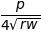

In [209]:
#Optimal quantity by solving the first order condition above for x
quan = sm.solve(FOC_x, x)[0]
quan

As such, we have the following for $x$:

$x = \frac{p}{4\sqrt{rw}}$

This yields the following profit:

In [212]:
#cost_1 is the total cost, when inserting the solution for quantity, x.
cost_1 = cost_func(x=quan,w=w,r=r,FC=FC)

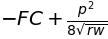

In [213]:
#Profit given the cost function and quantity above.
profit(p=p, x=quan, w=w, r=r, FC=FC, cost=cost_1)
simplify(profit(p=p, x=quan, w=w, r=r, FC=FC, cost=cost_1))

As such, the firm has a positive profit when the fixed costs are not too large:

$FC < \frac{p^2}{8\sqrt{rw}}$

**2.2 Optimal setting given parameter values**

For the following we assume the parameter values:

$p = 80 $

$w = 4 $

$ r = 1 $

$FC = 100$

In [214]:
#Set parameter values.
p_1 = 80
w_1 = 4
r_1 = 1
FC_1 = 100

In [215]:
#Define optimal quantity as found in 2.1.
def q(p=p, r=r, w=w):
    return p/(4*sqrt(r*w))

In [219]:
#Define optimal conditional demand for labour.
def fac_dem_l(w=w,r=r,x=x):
    return sqrt(r)/sqrt(w)*x**2

In [218]:
#Define optimal conditional demand for capital.
def fac_dem_k(w=w,r=r,x=x):
    return (sqrt(w)/sqrt(r))*(x**2)

In [220]:
#Storing quantity, conditional factor demands, cost and profit given paramter values and optimal solutions.
quan_1 = q(p=p_1, r=r_1, w=w_1)
demand_l = fac_dem_l(w=w_1,r=r_1,x=quan_1)
demand_k = fac_dem_k(w=w_1,r=r_1,x=quan_1)
total_cost = cost_func(x=quan_1,w=w_1,r=r_1,FC=FC_1)
profit_1 = profit(p=p_1, x=quan_1, w=w_1, r=r_1, FC=FC_1, cost=total_cost)

print(f'The firm produces the amount x: {q(p=p_1, r=r_1, w=w_1)} with conditional labour demand: {demand_l} and conditional captial demand: {demand_k}.')
print(f'This yields total costs of {total_cost} and profits of {profit_1}.')


The firm produces the amount x: 10 with conditional labour demand: 50 and conditional captial demand: 200.
This yields total costs of 500 and profits of 300.


**2.3 Plotting costs and profit given set paramter values**

In [225]:
#Three empty vectores for profit, marginal cost and total cost. Quantity x randomly drawn, N=10.000
N = 10000
x_vec = np.linspace(0.001,20,N)
profit_vec = np.empty(N)
mc_vec = np.empty(N)
tc_vec = np.empty(N)

#Marginal cost, total cost and profit.
for i,x_1 in enumerate(x_vec):
    mc_vec[i] = 4*sqrt(w_1*r_1)*x_1
    tc_vec[i] = cost_func(x=x_1,w=w_1,r=r_1,FC=FC_1)
    profit_vec[i] = profit(p=p_1, x=x_1, w=w_1, r=r_1, FC=FC_1, cost=cost_func(x=x_1,w=w_1,r=r_1,FC=FC_1))

Text(0.5,1,'Figure 4: Cost & Profit at Given Parameter Values')

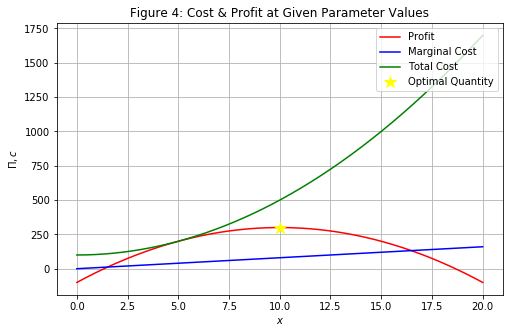

In [227]:
#Plotting profit, marginal cost and total cost - given parameter values above.
fig = plt.figure(figsize=(8,5))

ax = fig.add_subplot(1,1,1)
ax.plot(x_vec, profit_vec, color="red", label='Profit')
ax.plot(x_vec, mc_vec, color="blue", label="Marginal Cost")
ax.plot(x_vec, tc_vec, color="green", label="Total Cost")
ax.plot(quan_1,profit_1,ls='',marker='*',
        markersize=12,markerfacecolor='yellow',
        markeredgecolor='yellow',label='Optimal Quantity')

ax.grid(True)
ax.set_ylabel('$\Pi, c$')
ax.set_xlabel('$x$')
ax.legend(loc='upper right')
plt.title("Figure 4: Cost & Profit at Given Parameter Values")

We note, the optimal quantity corresponds to the solution found in 2.2. I.e. the optimal quantity produced is $x=10$. This yields a profit of 300 and total costs of 500.